### Задание №1
Вам необходимо провести базовый EDA выбранного набора данных.
https://en.wikipedia.org/wiki/Exploratory_data_analysis

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play; - https://www.kaggle.com/lava18/google-play-store-apps
данные о видео из трендов YouTube; - https://www.kaggle.com/datasnaek/youtube-new
данные об уровне счастья в разных странах. - https://www.kaggle.com/unsdsn/world-happiness

In [473]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [474]:
# Для исследования берем датасет "Данные приложений из Google"
google_df = pd.read_csv('C:/Netology/Homework/016_Visualization/google_dataset/googleplaystore.csv')

In [475]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [476]:
google_df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4289,KDRAMA Amino for K-Drama Fans,SOCIAL,4.6,4046,63M,"100,000+",Free,0,Teen,Social,"July 13, 2018",1.8.19106,4.0.3 and up
8458,Google Sheets,PRODUCTIVITY,4.3,496397,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8956,4K Ultra Camera,PHOTOGRAPHY,4.2,382,2.9M,"100,000+",Free,0,Everyone,Photography,"July 30, 2018",39.272.12,2.2 and up
8827,DS Barometer - Altimeter and Weather Information,WEATHER,3.9,2962,4.2M,"100,000+",Free,0,Everyone,Weather,"July 9, 2018",3.67,2.3.3 and up
4724,LINE WEBTOON - Free Comics,COMICS,4.5,1013944,Varies with device,"10,000,000+",Free,0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device


In [477]:
# Считаем кол-во пропусков в каждом столбце. Большое ко-во пропусков в столбце Rating
google_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<AxesSubplot:>

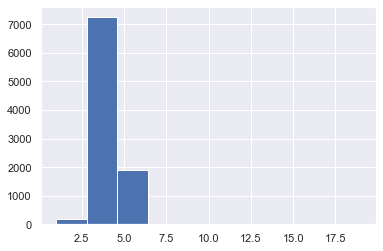

In [478]:
# Смотрим распределение по столбцу Rating. Явно выделяется , какое то значение выше 5 , это выброс и однозначно ошибка 
google_df['Rating'].hist()

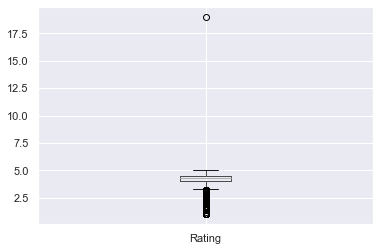

In [479]:

rating = pd.read_csv('C:/Netology/Homework/016_Visualization/google_dataset/googleplaystore.csv')
rating.boxplot()
plt.show()

In [480]:
# Находим все значения выше 5 и удаляем их
google_df[google_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [481]:
google_df.drop([10472], inplace=True)

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

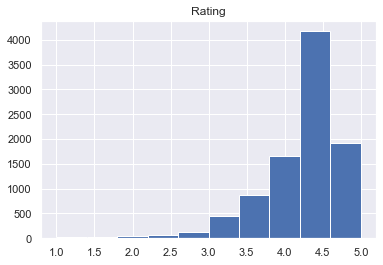

In [482]:
google_df.hist()

In [483]:
# Заполняем пропуски в Rating медианой 
google_df.loc[:, 'Rating'].fillna(google_df['Rating'].median(), inplace=True)
google_df.columns = google_df.columns.str.replace(' ','_')
# Заполняем незначительные пропуски в категориальных значениях модой
google_df['Type'].fillna(str(google_df.Type.mode().values[0]), inplace=True)
google_df['Current_Ver'].fillna(str(google_df.Current_Ver.mode().values[0]), inplace=True)
google_df['Android_Ver'].fillna(str(google_df.Android_Ver.mode().values[0]), inplace=True)

In [484]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Для построение графиков визуализаций и анализа преобразуем столбцы Reviews, Installs, Price, Size  в числовые значения

In [485]:
google_df['Reviews'] = google_df['Reviews'].apply(lambda x: int(x))

In [486]:
google_df['Price'] = google_df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
google_df['Price'] = google_df['Price'].apply(lambda x: float(x))

In [487]:
google_df['Installs'] = google_df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
google_df['Installs'] = google_df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
google_df['Installs'] = google_df['Installs'].apply(lambda x: float(x))

In [488]:
google_df['Size'] = google_df['Size'].apply(lambda x: x.replace('Varies with device', 'Nan') if 'Varies with device' in str(x) else x)
google_df['Size'] = google_df['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
google_df['Size'] = google_df['Size'].apply(lambda x: float(str(x).replace('k', '')) /1000 if 'k' in str(x) else x)
google_df['Size'] = google_df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
google_df.loc[:, 'Size'].fillna(google_df['Size'].median(), inplace=True)
google_df['Size'] = google_df['Size'].apply(lambda x: float(x))

In [489]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  object 
 12  Android_Ver     10840 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.2+ MB


C:\Users\vagin\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


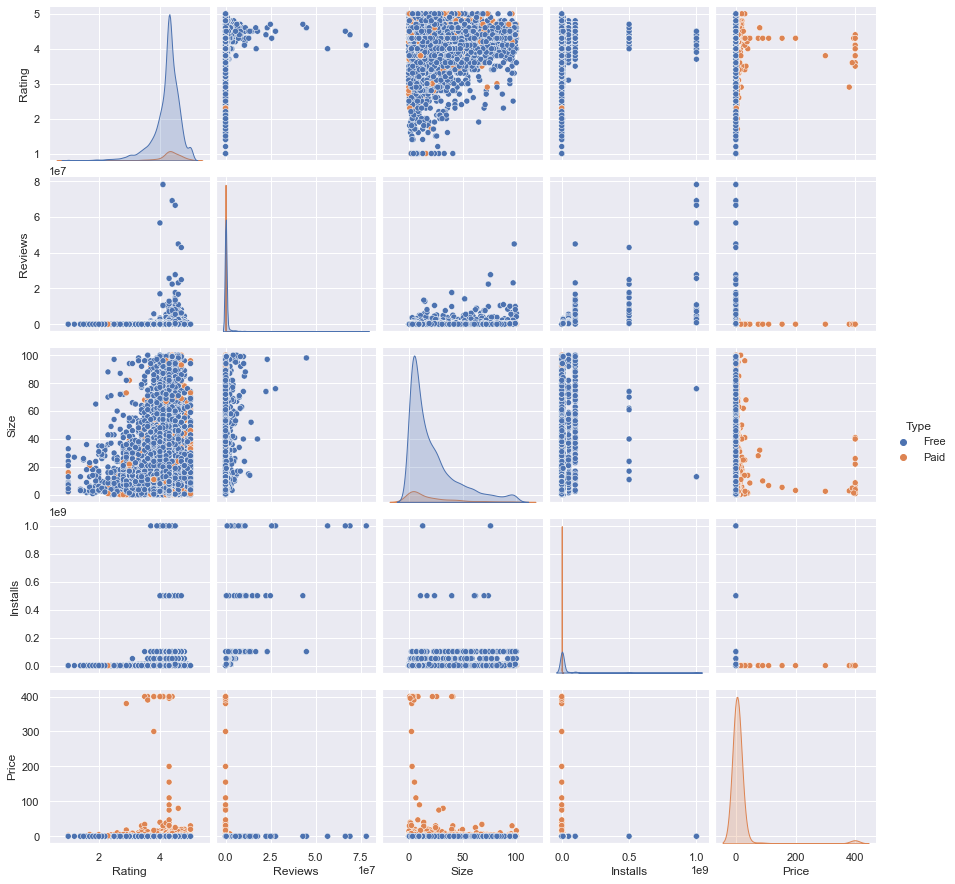

In [490]:
# Строим pairplot для соотношение всех числовых величин друг к другу 
sns.pairplot(google_df, hue='Type')

Text(0.5, 1.0, 'Количество приложений в каждой категории')

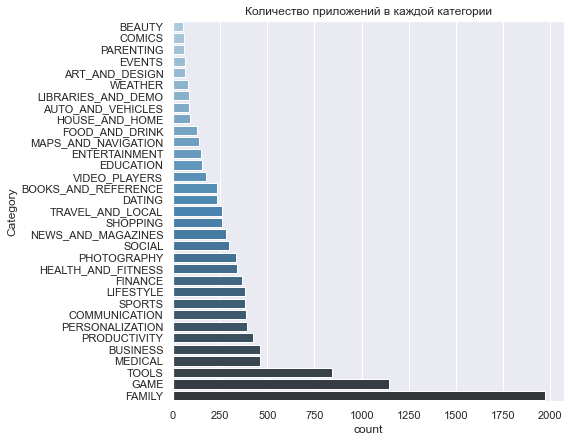

In [465]:
# Визуализация №1 Количество приложений в каждой категории
sns.set(style='darkgrid')
plt.figure(figsize=(7,7))
sns.countplot(y='Category', data=google_df, palette='Blues_d', order = google_df['Category'].value_counts().sort_values().index)
plt.title('Количество приложений в каждой категории')

Здесь мы может оценить и проанализировать для каких категорий меньше производиться приложений, а возможно они в них востребованы. В каких категорий избыток приложений . 

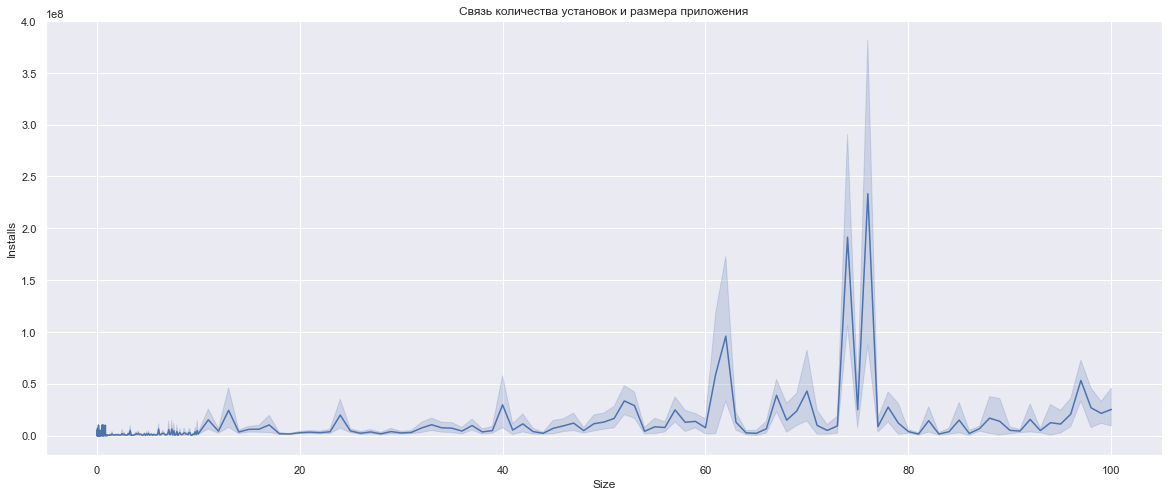

In [491]:
# Визуализация №2 - Связь количества установок и размера приложения

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
ax = sns.lineplot(x='Size', y='Installs', data=google_df)
title = ax.set_title('Связь количества установок и размера приложения')

Наибольшее число установок приходится на приложения с размером от 60-80Мб

In [492]:
# Визуализаwия № 3-  ТОП 10 категории с наибольшим количеством установок
top_category = google_df.groupby('Category')[['Installs']].sum().sort_values('Installs', ascending=False).head(10)
top_category.head()

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10


C:\Users\vagin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


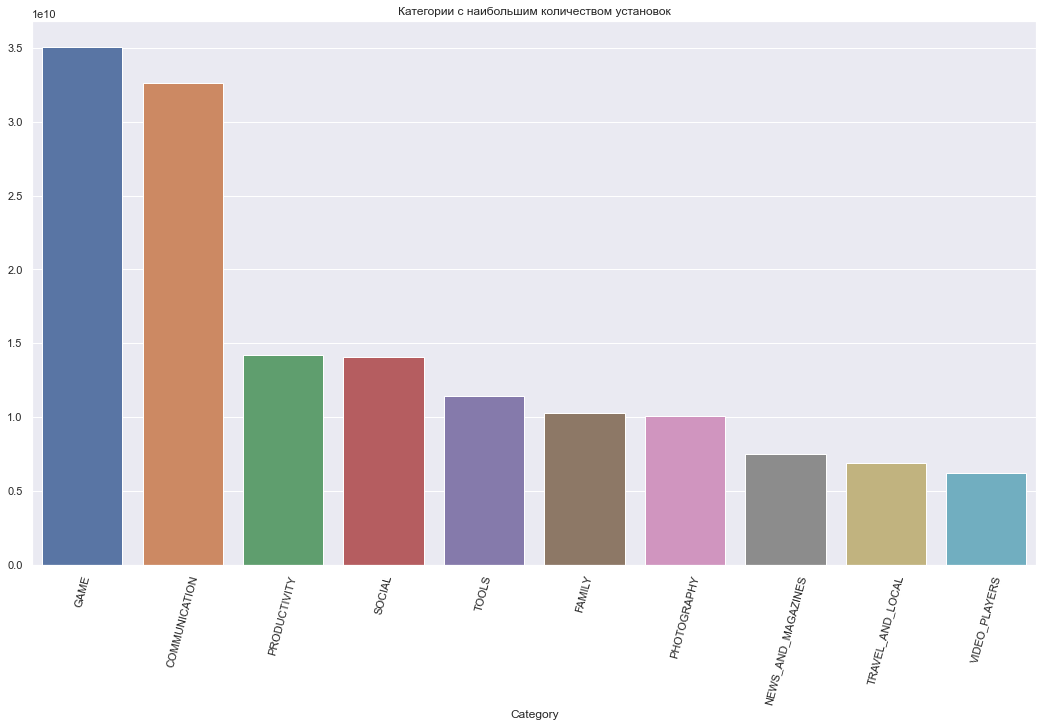

In [493]:
plt.figure(figsize=(18,10))
sns.barplot(top_category.index, top_category.Installs)
plt.title('Категории с наибольшим количеством установок')
plt.xticks(rotation=75);
plt.ylabel(None);
plt.xlabel('Category');

Со значительным отрывом лидируют категории Игры и Связь. Для рекламной компании, например, наиболее прибыльно будет размещать рекламу именно в этих категориях. 

In [494]:
# Визуализаwия № 4 - Топ 5 самых устанавливаемых приложений

In [495]:
top_apps = google_df.groupby('App')[['Installs']].sum().sort_values('Installs', ascending=False).head(5)
top_apps

,Installs
App,
Subway Surfers,6.000000e+09
Google News,4.000000e+09
Hangouts,4.000000e+09
Google Drive,4.000000e+09
Google Photos,4.000000e+09


C:\Users\vagin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Apps')

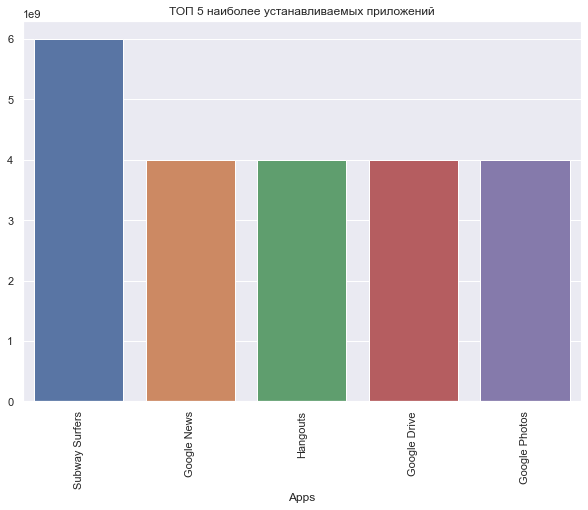

In [496]:
plt.figure(figsize=(10,7))
sns.barplot(top_apps.index, top_apps.Installs)

plt.title('ТОП 5 наиболее устанавливаемых приложений')
plt.xticks(rotation=90)
plt.ylabel(None)
plt.xlabel('Apps')